<a href="https://colab.research.google.com/github/Dhivagarocky/Machine-Learning/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [ ]:
df = pd.read_csv("/content/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Exploratory Data Analysis

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<Axes: xlabel='class', ylabel='Count'>

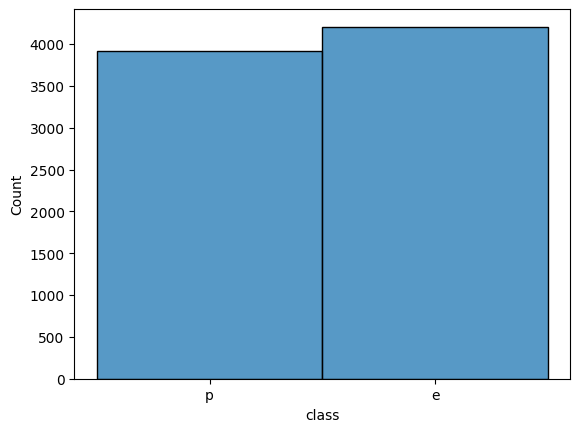

In [ ]:
sns.histplot(df['class'])

Separating the features and target

In [ ]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [ ]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print(Y)

[1 0 0 ... 0 1 0]


Poisonous = p-->1
Edible = e-->0

Splitting data to Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
X_train.shape, X_test.shape

((6499, 117), (1625, 117))

In [ ]:
Y_train.shape, Y_test.shape

((6499,), (1625,))

Decision Tree Creation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
from sklearn.metrics import accuracy_score

Creation of decision tree using Ginin index

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state = 0)


In [ ]:
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(0.5769230769230769, 0.875, 'x[27] <= 0.5\ngini = 0.5\nsamples = 6499\nvalue = [3348, 3151]'),
 Text(0.3076923076923077, 0.625, 'x[53] <= 0.5\ngini = 0.29\nsamples = 3702\nvalue = [651, 3051]'),
 Text(0.15384615384615385, 0.375, 'x[55] <= 0.5\ngini = 0.133\nsamples = 3256\nvalue = [234, 3022]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.05\nsamples = 3101\nvalue = [79, 3022]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 155\nvalue = [155, 0]'),
 Text(0.46153846153846156, 0.375, 'x[94] <= 0.5\ngini = 0.122\nsamples = 446\nvalue = [417, 29]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 417\nvalue = [417, 0]'),
 Text(0.8461538461538461, 0.625, 'x[100] <= 0.5\ngini = 0.069\nsamples = 2797\nvalue = [2697, 100]'),
 Text(0.7692307692307693, 0.375, 'x[63] <= 0.5\ngini = 0.031\nsamples = 2740\nvalue = [2697, 43]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.004\nsamples = 2689\nvalu

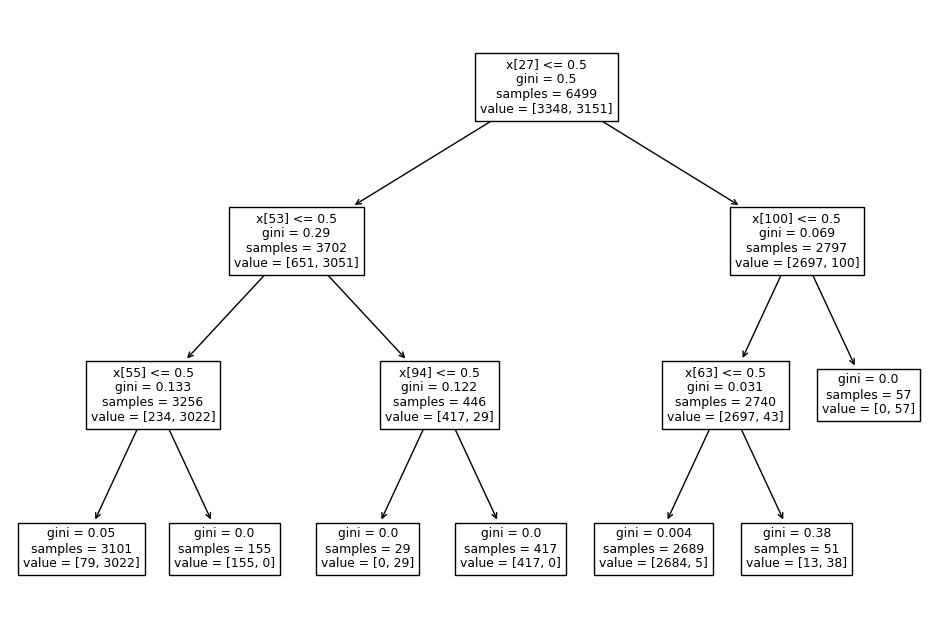

In [ ]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, Y_train))

In [ ]:
# predict the values
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
# predict the values using X_train for accuracy comparison
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
# Determine the accuracy score
print('Accuracy score with the criterion gini index : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

# Accuracy score for training data
print('Training set accuracy score : {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Accuracy score with the criterion gini index : 0.9858
Training set accuracy score : 0.9851


Creation of Decision tree using Entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5555555555555556, 0.875, 'x[27] <= 0.5\nentropy = 0.999\nsamples = 6499\nvalue = [3348, 3151]'),
 Text(0.3333333333333333, 0.625, 'x[20] <= 0.5\nentropy = 0.671\nsamples = 3702\nvalue = [651, 3051]'),
 Text(0.2222222222222222, 0.375, 'x[53] <= 0.5\nentropy = 0.973\nsamples = 1091\nvalue = [651, 440]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.932\nsamples = 674\nvalue = [234, 440]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 417\nvalue = [417, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 2611\nvalue = [0, 2611]'),
 Text(0.7777777777777778, 0.625, 'x[100] <= 0.5\nentropy = 0.222\nsamples = 2797\nvalue = [2697, 100]'),
 Text(0.6666666666666666, 0.375, 'x[63] <= 0.5\nentropy = 0.117\nsamples = 2740\nvalue = [2697, 43]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.02\nsamples = 2689\nvalue = [2684, 5]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.819\nsamples = 51\nvalue = [13, 38]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\ns

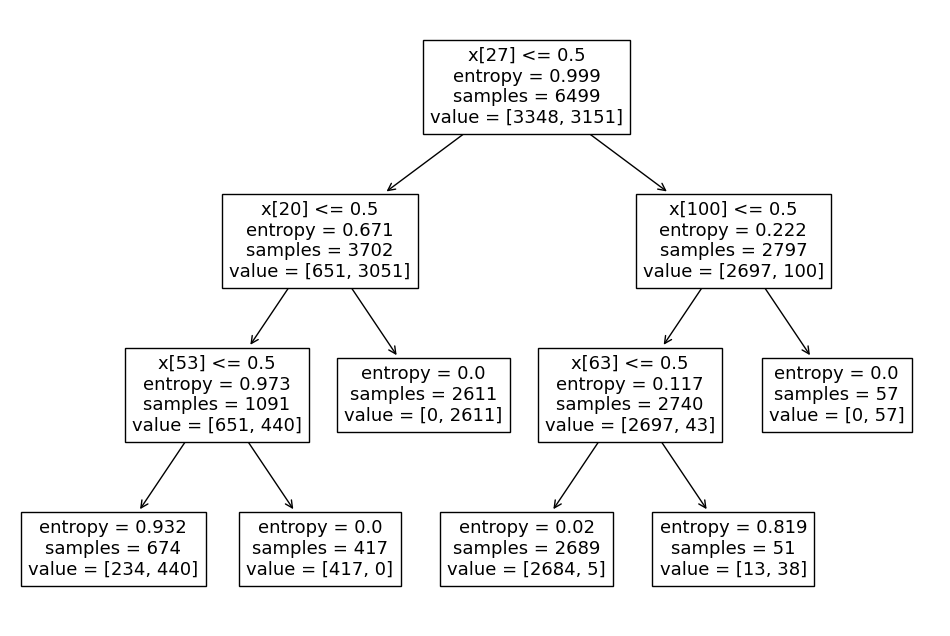

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, Y_train))

In [ ]:
# predict the value
y_pred_en = clf_en.predict(X_test)

In [ ]:
# Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9631
Training-set accuracy score: 0.9612


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [ ]:
cm = confusion_matrix(Y_test, y_pred_en)
